## 作業

請參考昨天的程式碼，將訓練資料讀取方式改寫成 Generator，並將原本的 model.fit 改為 model.fit_generator 來進行訓練。請參考 Keras [官方文件中 fit_generator 的說明](https://keras.io/models/sequential/)

In [7]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os

In [10]:
batch_size = 128 
num_classes = 10 
epochs = 10
LEARNING_RATE = 1e-3
MOMENTUM = 0.95

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM),
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)       

In [12]:
from sklearn.utils import shuffle
def my_generator(x, y, batch_size):
    while True:
        for idx in range(0, len(x), batch_size): 
            batch_x, batch_y = x[idx:idx+batch_size], y[idx:idx+batch_size]
            yield batch_x, batch_y
        x, y = shuffle(x, y)

In [13]:
train_generator = my_generator(x_train, y_train, batch_size)

In [15]:
history = model.fit_generator(train_generator,
                    steps_per_epoch=int(len(x_train)/batch_size),
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Epoch 1/10
390/390 [==============================] - 87s 224ms/step - loss: 0.2644 - accuracy: 0.9027 - val_loss: 0.2574 - val_accuracy: 0.9030
Epoch 2/10
390/390 [==============================] - 102s 261ms/step - loss: 0.2607 - accuracy: 0.9032 - val_loss: 0.2505 - val_accuracy: 0.9041
Epoch 3/10
390/390 [==============================] - 104s 267ms/step - loss: 0.2580 - accuracy: 0.9034 - val_loss: 0.2475 - val_accuracy: 0.9045
Epoch 4/10
390/390 [==============================] - 105s 270ms/step - loss: 0.2549 - accuracy: 0.9041 - val_loss: 0.2449 - val_accuracy: 0.9051
Epoch 5/10
390/390 [==============================] - 107s 274ms/step - loss: 0.2524 - accuracy: 0.9044 - val_loss: 0.2399 - val_accuracy: 0.9062
Epoch 6/10
390/390 [==============================] - 109s 279ms/step - loss: 0.2496 - accuracy: 0.9052 - val_loss: 0.2373 - val_accuracy: 0.9077
Epoch 7/10
390/390 [==============================] - 107s 275ms/step - loss: 0.2465 - accuracy: 0.9060 - val_loss: 0.2351 - 

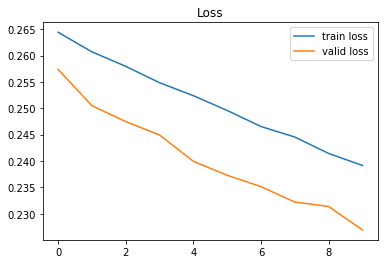

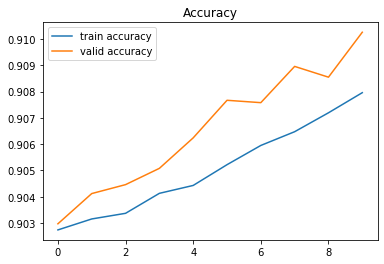

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
